# Проверка центральной предельной теоремы на примере треугольного распределения

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## В качестве непрерывного распреления возьмем &ndash; треугольное распределение
*a &ndash; нижний предел (a&le;b)  
c &ndash; наиболее вероятное (a&le;c&le;b)  
b &ndash; верхний предел (c&le;b)*

In [57]:
a = 0
b = 1
c = 0.25
rv = sts.triang(c = (c - a) / (b - a), loc = a, scale = b - a)

## График функции плотности вероятности выбранного распределения

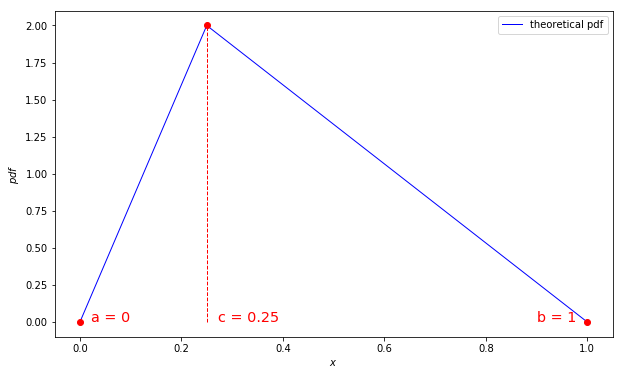

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
markedPoints = [a, c, b]
ax.plot(markedPoints, rv.pdf(markedPoints), 'b', lw=1, label='theoretical pdf')
markedPointsInfo = {'a': {'value': a, 'x': a + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])},
                    'c': {'value': c, 'x': c + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])},
                    'b': {'value': b, 'x': b - 0.09 * (ax.get_xlim()[1] - ax.get_xlim()[0])}}
ax.plot(markedPoints, rv.pdf(markedPoints), 'ro')
ax.vlines(x = c, ymin = 0, ymax = rv.pdf(c), linestyles = '--', lw = 1, colors = 'r')
for pointInfoName, pointInfo in markedPointsInfo.items():
    ax.text(pointInfo['x'],
            0,
            '{0} = {1}'.format(pointInfoName, pointInfo['value']),
            color = 'r',
            size="x-large")
ax.set_xlabel('$x$')
ax.set_ylabel('$pdf$')
ax.legend()
plt.show()

## Параметры треугольного распределения
*Математическое ожидание:  
$M=\frac{a+b+c}{3}$  
Дисперсия:  
$D=\frac{a^2+b^2+c^2-ab-ac-bc}{18}$*  
Источник: https://www.matematicus.ru/zakony-raspredeleniya-sluchajnoj-velichiny/treugolnoe-raspredelenie

In [59]:
mean = (a + b + c) / 3
variance = (a ** 2 + b ** 2 + c ** 2 - a * b - a * c - b * c) / 18
textTemplate = 'Значения M и D по формуле: M - {}, D - {}'
print(textTemplate.format(round(mean, 5), round(variance, 5)))
M, D = rv.stats()
textTemplate = 'Значения M и D из метода stats распределения triang: M - {}, D - {}'
print(textTemplate.format(round(float(M), 5), round(float(D), 5)))

Значения M и D по формуле: M - 0.41667, D - 0.04514
Значения M и D из метода stats распределения triang: M - 0.41667, D - 0.04514


## Сгенерируем выборку объема 1000

In [60]:
sampleSize = 1000
sample = rv.rvs(size=sampleSize)

## Гистограмма выборки

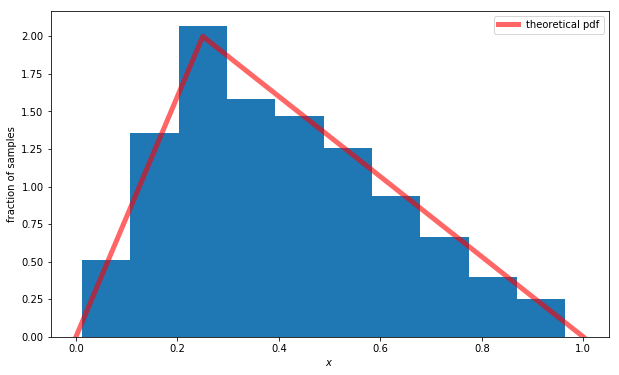

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(sample, density=True)
ax.plot(markedPoints, rv.pdf(markedPoints), 'r-', lw=5, alpha=0.6, label='theoretical pdf')
ax.set_ylabel('fraction of samples')
ax.set_xlabel('$x$')
ax.legend()
plt.show()

## Генерация 1000 выборок разных объемов (3, 5, 10, 50)

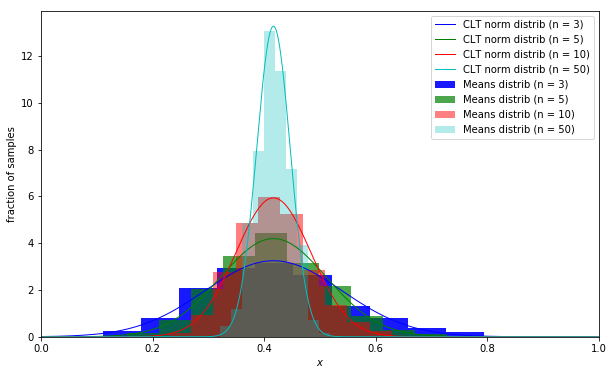

In [62]:
n = [3, 5, 10, 50]
colors = {3: 'b', 5: 'g', 10: 'r', 50: 'c'}
fig, ax = plt.subplots(figsize=(10,6))
meanOfMeans = {}
for nSize in n:
    n_sample = rv.rvs(size=(sampleSize, nSize))
    meanOfMeans[nSize] = n_sample.mean(axis=1)
x = np.linspace(a, b, sampleSize)
alpha = 0.9
for nSize in n:
    ax.hist(meanOfMeans[nSize],
            density=True,
            alpha = alpha,
            label = 'Means distrib (n = {0})'.format(nSize),
            color = colors[nSize])
    alpha -= 0.2
    norm_rv = sts.norm(mean, (variance / nSize)**0.5)
    pdf = norm_rv.pdf(x)
    ax.plot(x,
            pdf,
            'r',
            lw=1,
            label='CLT norm distrib (n = {0})'.format(nSize),
            c = colors[nSize])
ax.set_ylabel('fraction of samples')
ax.set_xlabel('$x$')
ax.set_xlim(a, b)
ax.legend()
plt.show()

## Результат:
Центральная предельная теорема работает. С ростом n уменьшается величина дисперсии выборочных средних